# Specifing the Random Seed

When building a UseCase, you can provide a random_seed value. It is used to initialize the pseudo-random number generator.
This makes it possible to exactly reproduce the results of running a RAMP UseCase, for example to provide a code sample which exactly produces the presented data and plots in a paper.

## Generate a UseCase without specified seed
- By default, the random_seed is None. In this case, the pseudo-random number generator uses the current system time as seed. (See https://docs.python.org/3/library/random.html#bookkeeping-functions for details). 
- All UseCases in the following example are generated with the User_list from input_file_1 of the examples.
- The UseCase is initialized and a load profile is generated.


In [1]:
from ramp import UseCase
from copy import deepcopy

In [7]:
# Import users list of example file 1
from ramp.example.input_file_1 import User_list

# Build use case 1 with non-fixed seed
uc_1 = UseCase(users=deepcopy(User_list), random_seed=None)
# Initialize and generate load profile
uc_1.initialize(peak_enlarge=0.15, num_days=3)
uc_1_lp = uc_1.generate_daily_load_profiles()

You will simulate 3 day(s) from 2024-05-08 00:00:00 until 2024-05-11 00:00:00


## Generate two UseCases with fixed random seed
- The same, fixed random seed is specified for UseCases 2 and 3. 
- The users and parameters of initialization are identical with UseCase 1
- A load profile is generated for each UseCase

In [3]:
# Build use case 2 and fixed random seed
uc_2 = UseCase(users=deepcopy(User_list), random_seed=1)
# Initialize and generate load profile
uc_2.initialize(peak_enlarge=0.15, num_days=3)
uc_2_lp = uc_2.generate_daily_load_profiles()

# Build use case 3 and same fixed random seed as uc_2
uc_3 = UseCase(users=deepcopy(User_list), random_seed=1)

# Initialize and generate load profile
uc_3.initialize(peak_enlarge=0.15, num_days=3)
uc_3_lp = uc_3.generate_daily_load_profiles()

You will simulate 3 day(s) from 2024-05-08 00:00:00 until 2024-05-11 00:00:00
You will simulate 3 day(s) from 2024-05-08 00:00:00 until 2024-05-11 00:00:00


## Comparing the results
The plot visualizes the effect of specifying the random seed:
- The load profiles of UseCase 2 and 3 are identical.
- The load profile of UseCase 1 is different, since the pseudo-random number generators seed was not specified.
If you rerun the above code and plot the new load profiles, you will notice that the load profile of UseCase 2 and 3 remain unchanged, while the result of UseCase 1 differs. 

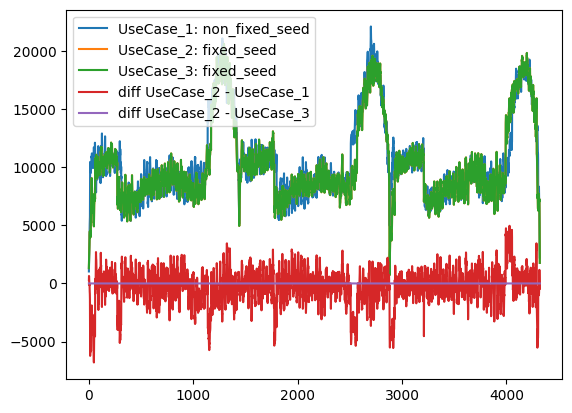

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

lp_df = pd.DataFrame(
    {
        "UseCase_1: non_fixed_seed": uc_1_lp,
        "UseCase_2: fixed_seed": uc_2_lp,
        "UseCase_3: fixed_seed": uc_3_lp,
        "diff UseCase_2 - UseCase_1": uc_2_lp
        - uc_1_lp,  # difference between uc_1 and uc_2 is not zero
        "diff UseCase_2 - UseCase_3": uc_2_lp
        - uc_3_lp,  # difference between uc_2 and uc_3 is zero
    }
)
lp_df.plot()
plt.show()